<a href="https://colab.research.google.com/github/diego-ciciani01/ADM---HW4/blob/main/HW4_es2_2_1_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from functools import reduce

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
#command used to do unzip operation, bash command
#!unzip /content/drive/MyDrive/Colab\ Notebooks/università/ADM/Homework_4/dataset/archive.zip -d /content/drive/MyDrive/Colab\ Notebooks/università/ADM/Homework_4/dataset/

In [ ]:
path_dataset = "/content/drive/MyDrive/Colab Notebooks/università/ADM/Homework_4/dataset/vodclickstream_uk_movies_03.csv"
dataset = pd.read_csv(path_dataset)

In [ ]:
dataset

,Unnamed: 0,datetime,duration,title,genres,release_date,movie_id,user_id
0,58773,2017-01-01 01:15:09,0.0,"Angus, Thongs and Perfect Snogging","Comedy, Drama, Romance",2008-07-25,26bd5987e8,1dea19f6fe
1,58774,2017-01-01 13:56:02,0.0,The Curse of Sleeping Beauty,"Fantasy, Horror, Mystery, Thriller",2016-06-02,f26ed2675e,544dcbc510
2,58775,2017-01-01 15:17:47,10530.0,London Has Fallen,"Action, Thriller",2016-03-04,f77e500e7a,7cbcc791bf
3,58776,2017-01-01 16:04:13,49.0,Vendetta,"Action, Drama",2015-06-12,c74aec7673,ebf43c36b6
4,58777,2017-01-01 19:16:37,0.0,The SpongeBob SquarePants Movie,"Animation, Action, Adventure, Comedy, Family, ...",2004-11-19,a80d6fc2aa,a57c992287
...,...,...,...,...,...,...,...,...
671731,730504,2019-06-30 21:37:08,851.0,Oprah Presents When They See Us Now,Talk-Show,2019-06-12,43cd23f30f,57501964fd
671732,730505,2019-06-30 21:49:34,91157.0,HALO Legends,"Animation, Action, Adventure, Family, Sci-Fi",2010-02-16,febf42d55f,d4fcb079ba
671733,730506,2019-06-30 22:00:44,0.0,Pacific Rim,"Action, Adventure, Sci-Fi",2013-07-12,7b15e5ada1,4a14a2cd5a
671734,730507,2019-06-30 22:04:23,0.0,ReMastered: The Two Killings of Sam Cooke,"Documentary, Music",2019-02-08,52d49c515a,0b8163ea4b


2.1

In [ ]:
### Convert genres from comma separated value to a list of values

In [ ]:
# Applying a lambda function to the 'genres' column of the dataset.
# The lambda function splits each row's genres string into a list of genres using ',' as the delimiter.
dataset.genres.apply(lambda row: row.split(','))

0                                [Comedy,  Drama,  Romance]
1                   [Fantasy,  Horror,  Mystery,  Thriller]
2                                       [Action,  Thriller]
3                                          [Action,  Drama]
4         [Animation,  Action,  Adventure,  Comedy,  Fam...
                                ...                        
671731                                          [Talk-Show]
671732    [Animation,  Action,  Adventure,  Family,  Sci...
671733                        [Action,  Adventure,  Sci-Fi]
671734                                [Documentary,  Music]
671735                                     [Comedy,  Drama]
Name: genres, Length: 671736, dtype: object

In [ ]:
# Creating a new column 'gen_list' in the 'dataset' DataFrame.

# Applying a lambda function to the 'genres' column of the dataset.
# The lambda function splits each row's genres string into a list of genres using ', ' as the delimiter.

dataset['gen_list'] = dataset.genres.apply(lambda row: [word.strip() for word in row.split(', ')])

In [ ]:
dataset

,Unnamed: 0,datetime,duration,title,genres,release_date,movie_id,user_id,gen_list
0,58773,2017-01-01 01:15:09,0.0,"Angus, Thongs and Perfect Snogging","Comedy, Drama, Romance",2008-07-25,26bd5987e8,1dea19f6fe,"[Comedy, Drama, Romance]"
1,58774,2017-01-01 13:56:02,0.0,The Curse of Sleeping Beauty,"Fantasy, Horror, Mystery, Thriller",2016-06-02,f26ed2675e,544dcbc510,"[Fantasy, Horror, Mystery, Thriller]"
2,58775,2017-01-01 15:17:47,10530.0,London Has Fallen,"Action, Thriller",2016-03-04,f77e500e7a,7cbcc791bf,"[Action, Thriller]"
3,58776,2017-01-01 16:04:13,49.0,Vendetta,"Action, Drama",2015-06-12,c74aec7673,ebf43c36b6,"[Action, Drama]"
4,58777,2017-01-01 19:16:37,0.0,The SpongeBob SquarePants Movie,"Animation, Action, Adventure, Comedy, Family, ...",2004-11-19,a80d6fc2aa,a57c992287,"[Animation, Action, Adventure, Comedy, Family,..."
...,...,...,...,...,...,...,...,...,...
671731,730504,2019-06-30 21:37:08,851.0,Oprah Presents When They See Us Now,Talk-Show,2019-06-12,43cd23f30f,57501964fd,[Talk-Show]
671732,730505,2019-06-30 21:49:34,91157.0,HALO Legends,"Animation, Action, Adventure, Family, Sci-Fi",2010-02-16,febf42d55f,d4fcb079ba,"[Animation, Action, Adventure, Family, Sci-Fi]"
671733,730506,2019-06-30 22:00:44,0.0,Pacific Rim,"Action, Adventure, Sci-Fi",2013-07-12,7b15e5ada1,4a14a2cd5a,"[Action, Adventure, Sci-Fi]"
671734,730507,2019-06-30 22:04:23,0.0,ReMastered: The Two Killings of Sam Cooke,"Documentary, Music",2019-02-08,52d49c515a,0b8163ea4b,"[Documentary, Music]"


In [ ]:
# Using the 'reduce' function to merge all genre lists from the 'gen_list' column into a single set of unique genres.

# The lambda function takes two sets, x and y, and computes their union.
# This is applied iteratively across all elements in the 'dataset.gen_list' column.

unique_genres = reduce(lambda x, y: set(x).union(set(y)), dataset.gen_list)

In [ ]:
 unique_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'NOT AVAILABLE',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western'}

In [ ]:
# Group by 'genres', calculate the sum of 'duration' for each genre
df1 = dataset.explode('gen_list')
total_duration_per_user_genre = df1.groupby(['user_id', 'gen_list'])['duration'].sum().reset_index()

idx = total_duration_per_user_genre.groupby('user_id')['duration'].idxmax()

# Extract the gender with the corresponding max duration
favorite_genre_per_user= total_duration_per_user_genre.loc[idx]
favorite_genre_per_user.rename(columns={'gen_list':'favorite_genre'}, inplace=True)

In [ ]:
favorite_genre_per_user

,user_id,favorite_genre,duration
0,00004e2862,Crime,0.0
3,000052a0a0,Action,37270.0
17,000090e7c8,Mystery,0.0
20,000118a755,Horror,0.0
22,000296842d,Drama,77307.0
...,...,...,...
861713,fffd9bf758,Crime,8495.0
861716,fffe7b777b,Drama,1785.0
861723,fffeac83be,Drama,355099.0
861728,ffff2c5f9e,Action,0.0


In [ ]:

#convert the datetime and release_date in 'datetime' format
dataset['datetime'] = pd.to_datetime(dataset['datetime'])
dataset['release_date'] = pd.to_datetime(dataset['release_date'],errors='coerce')
dataset['date'] = dataset['datetime'].dt.date

#get hour from the datatime
dataset['hour'] = dataset['datetime'].dt.hour
dataset['release_year'] = dataset['release_date'].dt.year
#let's map the hour in category
dataset['time_of_day'] = pd.cut(dataset['hour'], bins=[0, 12, 18, 24], labels=['Morning', 'Afternoon', 'Night'], include_lowest=True)

# calculate the total time for time category and film category
total_time_per_user_time_of_day = dataset.groupby(['user_id', 'time_of_day'])['duration'].sum().reset_index()
favorite_time_of_day_per_user = total_time_per_user_time_of_day.loc[total_time_per_user_time_of_day.groupby('user_id')['duration'].idxmax()] # favorite time of day
dataset['movie_category'] = dataset['release_year'].apply(lambda year: 'Old' if year < 2010 else 'Recent')


# Calculate the average click duration for each genre
average_duration_per_genre  = dataset.groupby(by='user_id')['duration'].mean().reset_index()



# Group by user and count the number of old and recent movies watched
user_preference = dataset.groupby('user_id')['movie_category'].value_counts().unstack().fillna(0)

# Group by user and date, summing the daily duration
daily_duration = dataset.groupby(['user_id', 'date'])['duration'].sum().reset_index()

# Determine whether the user is an old movie lover or into more recent stuff
user_preference['preference'] = user_preference['Old'] > user_preference['Recent']
user_preference['preference'] = user_preference['preference'].map({True: 'Old Movie Lover', False: 'More into Recent Stuff'})

# Calculate the average time spent per day by each user
average_time_per_day = daily_duration.groupby('user_id')['duration'].mean().reset_index()


In [ ]:
favorite_genre_per_user

,user_id,favorite_genre,duration
0,00004e2862,Crime,0.0
3,000052a0a0,Action,37270.0
17,000090e7c8,Mystery,0.0
20,000118a755,Horror,0.0
22,000296842d,Drama,77307.0
...,...,...,...
861713,fffd9bf758,Crime,8495.0
861716,fffe7b777b,Drama,1785.0
861723,fffeac83be,Drama,355099.0
861728,ffff2c5f9e,Action,0.0


now the remaming columns proces

In [ ]:
#rename columns
average_duration_per_genre.rename(columns={"duration":"avg_click_duration"}, inplace=True)
average_time_per_day.rename(columns={'duration':'avg_time_spend_day'}, inplace=True)

In [ ]:
#remove unused colums
favorite_time_of_day_per_user = favorite_time_of_day_per_user.drop('duration', axis=1)
favorite_genre_per_user=favorite_genre_per_user.drop('duration', axis=1)
user_preference=user_preference.drop(['Old','Recent'],axis=1)

In [ ]:
# Merging DataFrames using the 'pd.merge' function to create a new consolidated dataset.
new_dataset = pd.merge(favorite_time_of_day_per_user,favorite_genre_per_user, on=('user_id'), how='left')
new_dataset = pd.merge(new_dataset, average_duration_per_genre, on = ('user_id'), how='left')
new_dataset = pd.merge(new_dataset, user_preference, on = ('user_id'), how='left')
new_dataset = pd.merge(new_dataset, average_time_per_day, on = ('user_id'), how='left')

In [ ]:
new_dataset

,user_id,time_of_day,favorite_genre,avg_click_duration,preference,avg_time_spend_day
0,00004e2862,Morning,Crime,0.000000,Old Movie Lover,0.000
1,000052a0a0,Afternoon,Action,2024.166667,More into Recent Stuff,4858.000
2,000090e7c8,Morning,Mystery,0.000000,More into Recent Stuff,0.000
3,000118a755,Afternoon,Horror,-0.250000,More into Recent Stuff,-0.500
4,000296842d,Morning,Drama,9663.375000,More into Recent Stuff,38653.500
...,...,...,...,...,...,...
161913,fffd9bf758,Afternoon,Crime,8495.000000,More into Recent Stuff,8495.000
161914,fffe7b777b,Afternoon,Drama,1785.000000,More into Recent Stuff,1785.000
161915,fffeac83be,Night,Drama,40606.272727,More into Recent Stuff,55833.625
161916,ffff2c5f9e,Morning,Action,0.000000,More into Recent Stuff,0.000


 10 additional features that can be generated for each user_id, you can use chatGPT

In [ ]:
#Identify the day of the week when the user spends the most time watching movies
dataset['day_of_week'] = dataset['datetime'].dt.dayofweek
most_active_day = dataset.groupby('user_id')['day_of_week'].value_counts().unstack().idxmax(axis=1)
most_active_day.name = 'most_active_day'

In [ ]:
#Count the number of movies watched by the user on weekends
weekend_movies_count = dataset[dataset['datetime'].dt.weekday.isin([5, 6])].groupby('user_id')['duration'].count()
weekend_movies_count.name='weekend_movies_count'

In [ ]:
#Find the longest duration of a movie watched by the user.

max_duration_per_user = dataset.groupby('user_id')['duration'].max()
max_duration_df = max_duration_per_user.reset_index(name='max_duration')


In [ ]:
#Average Release Year of Watched Movies
avg_release_year = dataset.groupby('user_id')['release_year'].mean()
avg_release_year.name="avg_release_year"

In [ ]:
# get num genres watched
# Split the 'genres' column and count the number of unique genres for each user
num_genres_watched = dataset['genres'].str.split(',').explode().groupby(dataset['user_id']).nunique()

# If you want to convert the result to a DataFrame, you can use reset_index
num_genres_watched_df = num_genres_watched.reset_index(name='num_genres_watched')

In [ ]:
#total watch time : Sum of the durations of all movies watched by the user.
total_watch_time =  dataset.groupby('user_id')['duration'].sum()
total_watch_time = total_watch_time.reset_index(name='total_watch_time')

In [ ]:
#Num_Movies_Watched: Count of movies watched by the user.
num_movies_watched =  dataset.groupby('user_id').size().reset_index()
num_movies_watched = num_movies_watched.rename(columns={0: 'num_movies_watched'})

In [ ]:
#Last Watched Movie: The title of the last movie watched by the user.

last_Watched_Movie = dataset.groupby('user_id').apply(lambda x: x.loc[x['datetime'].idxmax()]['title']).reset_index()
last_Watched_Movie = last_Watched_Movie.rename(columns={0: 'last_watched_movie'})

In [ ]:
#avg of the hour in with each user start to see film
most_active_hour = dataset.groupby(['user_id'])['hour'].mean()
most_active_hour.name="most_active_hour"

In [ ]:
#Genre_Diversit umber of unique genres watched by the user.
Genre_Diversity = dataset.groupby('user_id')['genres'].apply(lambda x: len(set(x.str.split(', ').sum()))).reset_index()
Genre_Diversity.rename(columns={"genres":"genre_diversity"}, inplace=True)

In [ ]:
#Description: Number of days elapsed since the user last watched a movie.
Days_Since_Last_Watch = (pd.to_datetime('today') - dataset.groupby('user_id')['datetime'].max()).dt.days

In [ ]:
Days_Since_Last_Watch.name="days_since_last_watch"

merge dataset

In [ ]:
new_dataset = pd.merge(new_dataset, most_active_day, on = ('user_id'), how='left')
new_dataset = pd.merge(new_dataset, weekend_movies_count, on = ('user_id'), how='left')
new_dataset = pd.merge(new_dataset, max_duration_df, on = ('user_id'), how='left')
new_dataset = pd.merge(new_dataset, avg_release_year, on = ('user_id'), how='left')
new_dataset = pd.merge(new_dataset, Days_Since_Last_Watch, on = ('user_id'), how='left')
new_dataset = pd.merge(new_dataset, Genre_Diversity, on = ('user_id'), how='left')
new_dataset = pd.merge(new_dataset, most_active_hour, on = ('user_id'), how='left')
new_dataset = pd.merge(new_dataset, num_genres_watched_df, on = ('user_id'), how='left')
new_dataset = pd.merge(new_dataset, total_watch_time, on = ('user_id'), how='left')
new_dataset = pd.merge(new_dataset, num_movies_watched, on = ('user_id'), how='left')
new_dataset = pd.merge(new_dataset, last_Watched_Movie, on = ('user_id'), how='left')

In [ ]:
new_dataset

,user_id,time_of_day,favorite_genre,avg_click_duration,preference,avg_time_spend_day,most_active_day,weekend_movies_count,max_duration,avg_release_year,days_since_last_watch,genre_diversity,most_active_hour,num_genres_watched,total_watch_time,num_movies_watched,last_watched_movie
0,00004e2862,Morning,Crime,0.000000,Old Movie Lover,0.000,1,NaN,0.0,2001.000000,2192,3,20.000000,3,0.0,1,Hannibal
1,000052a0a0,Afternoon,Action,2024.166667,More into Recent Stuff,4858.000,6,11.0,7857.0,2007.750000,2354,14,18.125000,19,48580.0,24,The SpongeBob Movie: Sponge Out of Water
2,000090e7c8,Morning,Mystery,0.000000,More into Recent Stuff,0.000,4,NaN,0.0,2018.000000,2098,3,20.000000,3,0.0,1,Mute
3,000118a755,Afternoon,Horror,-0.250000,More into Recent Stuff,-0.500,4,NaN,0.0,1976.000000,2001,2,7.750000,2,-1.0,4,From Dusk till Dawn (franchise)
4,000296842d,Morning,Drama,9663.375000,More into Recent Stuff,38653.500,0,2.0,62860.0,2018.000000,1801,4,13.625000,4,77307.0,8,Black Mirror: Bandersnatch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161913,fffd9bf758,Afternoon,Crime,8495.000000,More into Recent Stuff,8495.000,2,NaN,8495.0,2015.000000,2359,3,18.000000,3,8495.0,1,The Fear of 13
161914,fffe7b777b,Afternoon,Drama,1785.000000,More into Recent Stuff,1785.000,5,1.0,1785.0,2017.000000,2300,3,17.000000,3,1785.0,1,The Circle
161915,fffeac83be,Night,Drama,40606.272727,More into Recent Stuff,55833.625,2,1.0,173436.0,2012.090909,2268,9,19.454545,12,446669.0,11,To the Bone
161916,ffff2c5f9e,Morning,Action,0.000000,More into Recent Stuff,0.000,6,2.0,0.0,2010.000000,2327,5,14.500000,5,0.0,2,Hot Fuzz


2.2

In [ ]:
# Creating an instance of the MinMaxScaler from the scikit-learn preprocessing module.
# The MinMaxScaler is used for feature scaling, transforming features to a specified range (usually [0, 1]).
# This scaling method is particularly useful when working with algorithms sensitive to the scale of input features.

scaler = preprocessing.MinMaxScaler()

In [ ]:
dataset_small = new_dataset[['avg_click_duration','avg_time_spend_day','most_active_day','weekend_movies_count','max_duration','avg_release_year','days_since_last_watch','genre_diversity', 'most_active_hour', 'num_genres_watched','total_watch_time','num_movies_watched']].sample(len(new_dataset))

In [ ]:
dataset_small

,avg_click_duration,avg_time_spend_day,most_active_day,weekend_movies_count,max_duration,avg_release_year,days_since_last_watch,genre_diversity,most_active_hour,num_genres_watched,total_watch_time,num_movies_watched
114591,-1.000000,-1.000000,4,NaN,-1.0,2018.000000,2000,2,21.000000,2,-1.0,1
66316,1256.000000,2093.333333,0,1.0,3140.0,2015.000000,1856,12,12.000000,13,6280.0,5
56521,399.666667,599.500000,1,NaN,1199.0,2013.666667,2142,5,18.000000,5,1199.0,3
104070,28411.000000,68186.400000,0,NaN,162500.0,2015.500000,2102,10,19.583333,13,340932.0,12
1110,327983.000000,327983.000000,6,1.0,327983.0,2017.000000,1621,5,0.000000,5,327983.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
87680,143715.000000,143715.000000,0,1.0,287426.0,2011.500000,1633,7,20.000000,7,287430.0,2
92994,2467.181818,3015.444444,3,2.0,27139.0,2013.727273,1667,9,1.909091,10,27139.0,11
23499,0.000000,0.000000,4,NaN,0.0,2003.000000,2175,3,13.000000,3,0.0,1
157893,-1.000000,-1.000000,4,NaN,-1.0,2008.000000,2182,4,22.000000,4,-1.0,1


In [ ]:
# Using the previously created MinMaxScaler instance ('scaler') to normalize values in the 'dataset_small'.

# The 'fit_transform' method of the scaler is applied to the 'dataset_small'.
# This computes the minimum and maximum values needed for scaling and transforms the data accordingly.
norm_values = scaler.fit_transform(dataset_small)
columns_df=['avg_click_duration','avg_time_spend_day','most_active_day','weekend_movies_count','max_duration','avg_release_year','days_since_last_watch','genre_diversity', 'most_active_hour', 'num_genres_watched','total_watch_time','num_movies_watched']

In [ ]:
dataset_norm = pd.DataFrame(norm_values,columns=columns_df )

In [ ]:
dataset_norm

,avg_click_duration,avg_time_spend_day,most_active_day,weekend_movies_count,max_duration,avg_release_year,days_since_last_watch,genre_diversity,most_active_hour,num_genres_watched,total_watch_time,num_movies_watched
0,0.000000e+00,0.000000e+00,0.666667,NaN,0.000000e+00,0.979381,0.417124,0.045455,0.913043,0.032258,4.719723e-08,0.000000
1,1.095717e-04,1.495149e-04,0.000000,0.000000,1.722299e-04,0.948454,0.259056,0.500000,0.521739,0.387097,2.964930e-04,0.005435
2,3.492581e-05,4.286981e-05,0.166667,NaN,6.579938e-05,0.934708,0.572997,0.181818,0.782609,0.129032,5.668387e-05,0.002717
3,2.476653e-03,4.867912e-03,0.000000,NaN,8.910387e-03,0.953608,0.529089,0.409091,0.851449,0.387097,1.609114e-02,0.014946
4,2.859012e-02,2.341484e-02,1.000000,0.000000,1.798429e-02,0.969072,0.001098,0.181818,0.000000,0.129032,1.547998e-02,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
161913,1.252762e-02,1.025991e-02,0.000000,0.000000,1.576043e-02,0.912371,0.014270,0.272727,0.869565,0.193548,1.356599e-02,0.001359
161914,2.151495e-04,2.153446e-04,0.500000,0.003096,1.488163e-03,0.935333,0.051592,0.363636,0.083004,0.290323,1.280980e-03,0.013587
161915,8.716925e-08,7.139020e-08,0.666667,NaN,5.483282e-08,0.824742,0.609221,0.090909,0.565217,0.064516,9.439445e-08,0.000000
161916,0.000000e+00,0.000000e+00,0.666667,NaN,0.000000e+00,0.876289,0.616905,0.136364,0.956522,0.096774,4.719723e-08,0.000000


In [ ]:
print(dataset_norm.isnull().any())

avg_click_duration       False
avg_time_spend_day       False
most_active_day          False
weekend_movies_count      True
max_duration             False
avg_release_year          True
days_since_last_watch    False
genre_diversity          False
most_active_hour         False
num_genres_watched       False
total_watch_time         False
num_movies_watched       False
dtype: bool


In [ ]:
#Removing the null values
dataset_norm["weekend_movies_count"] = dataset_norm["weekend_movies_count"].fillna(0)
dataset_norm["avg_release_year"] = dataset_norm["avg_release_year"].fillna(0)

In [ ]:
dataset_norm.info

<bound method DataFrame.info of         avg_click_duration  avg_time_spend_day  most_active_day  \
0             0.000000e+00        0.000000e+00         0.666667   
1             1.095717e-04        1.495149e-04         0.000000   
2             3.492581e-05        4.286981e-05         0.166667   
3             2.476653e-03        4.867912e-03         0.000000   
4             2.859012e-02        2.341484e-02         1.000000   
...                    ...                 ...              ...   
161913        1.252762e-02        1.025991e-02         0.000000   
161914        2.151495e-04        2.153446e-04         0.500000   
161915        8.716925e-08        7.139020e-08         0.666667   
161916        0.000000e+00        0.000000e+00         0.666667   
161917        1.565560e-04        3.845076e-04         0.000000   

        weekend_movies_count  max_duration  avg_release_year  \
0                   0.000000  0.000000e+00          0.979381   
1                   0.000000  1.722

2.2

One of the primary purposes of PCA is to reduce the dimensionality of data. It transforms the original features into a new set of uncorrelated variables called principal components, where the first few components capture the most variance in the data. This is beneficial when dealing with high-dimensional datasets, as it can simplify the analysis and reduce computational complexity.

In [ ]:

df = dataset_norm

# Extract features from DataFrame (assuming columns are features)
X = df.iloc[:, 1:]  # Seleziona tutte le colonne tranne la prima, che potrebbe essere l'etichetta/target

# Standardize the features (it is important to standardize before performing PCA)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)



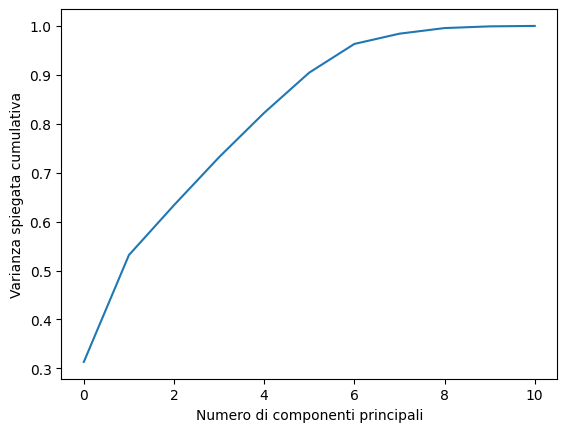

        avg_click_duration  avg_time_spend_day  most_active_day  \
0             0.000000e+00        0.000000e+00         0.666667   
1             1.095717e-04        1.495149e-04         0.000000   
2             3.492581e-05        4.286981e-05         0.166667   
3             2.476653e-03        4.867912e-03         0.000000   
4             2.859012e-02        2.341484e-02         1.000000   
...                    ...                 ...              ...   
161913        1.252762e-02        1.025991e-02         0.000000   
161914        2.151495e-04        2.153446e-04         0.500000   
161915        8.716925e-08        7.139020e-08         0.666667   
161916        0.000000e+00        0.000000e+00         0.666667   
161917        1.565560e-04        3.845076e-04         0.000000   

        weekend_movies_count  max_duration  avg_release_year  \
0                   0.000000  0.000000e+00          0.979381   
1                   0.000000  1.722299e-04          0.948454   
2  

In [ ]:
#inizialize the PCA modell
pca = PCA()

# Apply PCA to the standardized dataset
X_pca = pca.fit_transform(X_standardized)

# Display cumulative explained variance
explained_variance_ratio_cumulative = pca.explained_variance_ratio_.cumsum()
plt.plot(explained_variance_ratio_cumulative)
plt.xlabel('Numero di componenti principali')
plt.ylabel('Varianza spiegata cumulativa')
plt.show()

# Choose the desired number of principal components (e.g. 2) and project the data onto them
num_components = 2
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_standardized)

# create the new dataset from the resulto of PCA
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(num_components)])


# concat the new dataframe with the original dataframe
result_df = pd.concat([df[['avg_click_duration','avg_time_spend_day','most_active_day','weekend_movies_count','max_duration','avg_release_year','days_since_last_watch','genre_diversity', 'most_active_hour', 'num_genres_watched','total_watch_time','num_movies_watched']], pca_df], axis=1)


print(result_df)